<a href="https://colab.research.google.com/github/nananana25/CW5/blob/main/MIS140_Week_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to MIS140 Week 02


# Data Preparation


# 🏆 Learning Objectives
By the end of this lab, you will be able to:
- Load data into pandas from different sources
- Inspect and clean data for missing values and duplicates
- Transform and format data for consistency
- Handle categorical and numerical data


# 🛣️ **Activity Overview – “Road-Trip to Clean Data”**


Students work in Driver–Navigator pairs
* The **Driver** types and executes code
* The **Navigator** reads documentation, and logs decisions.
* Switch Driver ↔ Navigator at every **Discuss** prompt.


**Dataset:** `marketing_campaign.csv` – customer profiles, purchase behaviour, and past-campaign responses.

**Campaign Goal:** *Predict which customers will accept the next offer so marketing budget delivers maximum profit.*

| Milestone       | Step (What you do)          | Destination (What you produce)                     |
| :-------------- | :-------------------------- | :------------------------------------------------- |
| Acquire         | Load the raw file           | Preview rows & write one-sentence decision context |
| Inspect         | Surface data-quality issues | Rank risks to decision accuracy                    |
| Clean           | Fix high-impact issues      | Log every cleaning rule                            |
| Transform       | Engineer business features  | Explain how each links to KPIs                     |
| Validate & Save | Confirm integrity           | Export clean file & draft insights                 |




## 🗺️ MAP, MILESTONES & QUESTIONS


### Milestone 1 – Acquire

**Why?** *No glimpse of raw data ➜ no informed next step.*

**Business Question.** Do past responses, spend patterns, channel usage, demographics, and tenure give enough signal to predict next-campaign responders?

```python
import pandas as pd
df = pd.read_csv("marketing_campaign.csv")
df.head()
```

**Discuss A**

* Does column granularity suit a response-propensity model?
* What extra data (e.g., loyalty tier, geo-location) might sharpen profit uplift?

---



In [27]:
# Your code here

import pandas as pd
df = pd.read_csv("/marketing_campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpend,DigitalEngagement
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,1617,15
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,776,12
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,422,10


1. The current granularity is good because it provides the necessary individual-level detail for a predictive model. If the data were, for example, aggregated at a regional or weekly level for all customers, it would be much harder to build a model that predicts individual customer responses. The granularity directly supports the objective of understanding and predicting individual customer behavior.

2. While the marketing_campaign.csv dataset provides rich customer and purchase behavior information, integrating external data like loyalty tiers and geo-location could significantly sharpen profit uplift predictions. A formal 'loyalty tier' (e.g., Bronze, Silver, Gold status) or a calculated Customer Lifetime Value (CLTV) would provide a more holistic view of a customer's long-term value and commitment. Geographic segmentation can uncover regional buying patterns or preferences that are not evident from the existing demographic or behavioral data alone.

---

### Milestone 2 – Inspect

**Why?** *Dirty inputs skew every downstream statistic and model.*

**Business Question.** Which data-quality risks could mislead profit-driven decisions?

```python
df.shape
df.info()
df.describe()
```

**Discuss B**

* Are there outliers or disguised missing values in `Income`?
* Is `Response` highly imbalanced, and how might that bias accuracy metrics?

---



In [28]:
# Your code here

#check the number of rows and columns
df.shape

(2216, 31)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [23]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpend,DigitalEngagement
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,607.075361,9.404332
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,602.900476,3.565683
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,69.000000,7.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.500000,9.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1048.000000,11.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,28.000000


In [31]:
print(df['Response'].value_counts())

Response
0    1883
1     333
Name: count, dtype: int64


In [32]:
print(df['Response'].value_counts(normalize=True))

Response
0    0.849729
1    0.150271
Name: proportion, dtype: float64


1. * The huge gap between the 75% and the maximum value suggests the presence of a few extremely high income values, which are likely outliers. These values could significantly skew analyses and models if not handled appropriately.
 * There are no disguised missing values in the form of non-numeric strings or other placeholder text that would prevent it from being treated as a numerical column.

2. Yes, the 'response' column is highly imbalanced. The output from df['Response'].value_counts(normalize=True) shows that the class 0 (Non-responders) reached approximately 85% of the data and the class 1 (Responders) around 15% of the data. This significant imbalance can heavily bias traditional accuracy metrics like overall accuracy, that is because bias towards the majority class, misleading performance and poor generalization. To address this, it is crucial to use evaluation metrics that are more robust to class imbalance. For example, confusion matrix, this provides a detailed breakdown of correct and incorrect predictions for each class.


### Milestone 3 – Clean

**Why?** *Correcting defects preserves insight credibility.*

**Business Question.** How do we mitigate each high-impact quality issue?

```python
# Missing values
df.isna().sum()
# choose drop / fill / model-based imputation here ...

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fix data types
df['DtCustomer'] = pd.to_datetime(df['DtCustomer'])

```

**Discuss C**

* Which imputation method for `Income` balances realism and variance?
* Convert `DtCustomer` to **Customer Tenure** (months or years) – which is clearer for managers?
* Should rare `Education`/`Marital` categories be grouped to improve statistical power?

---



In [33]:

# Missing values
df.isna().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [45]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2211  10870        1967  Graduation        Married  61223.0        0   
2212   4001        1946         PhD       Together  64014.0        2   
2213   7270        1981  Graduation       Divorced  56981.0        0   
2214   8235        1956      Master       Together  69245.0        0   
2215   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0  2012-09-04       58       635  ...             0   

In [44]:
# Fix data types
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')
print(df['Dt_Customer'])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2211   2013-06-13
2212   2014-06-10
2213   2014-01-25
2214   2014-01-24
2215   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]


1. For Income, which is a continuous variable with potential correlations to other features, Multiple Imputation is generally the best method for balancing both realism and variance. It provides the most statistically sound approach by reflecting the uncertainty of the imputed values. If multiple imputation is too complex for the project, Stochastic Regression Imputation (regression imputation with added random noise) is a strong second choice, as it introduces variability and preserves relationships better than simple mean/median imputation, thus offering a better balance between realism and variance.




### Milestone 4 – Transform

**Why?** *Engineered features speak the language of KPIs and sharpen model lift.*

**Business Question.** Which engineered variables improve discrimination between responders and non-responders?

```python
# Example engineered features
df['TotalSpend'] = (df[['MntFishProducts','MntMeatProducts','MntFruits',
                        'MntSweetProducts','MntWines','MntGoldProds']]
                    .sum(axis=1))

df['DigitalEngagement'] = df['NumWebPurchases'] + df['NumWebVisitsMonth']
```

**Discuss D**

* Which feature (Total Spend, Category Mix, Digital Engagement, Tenure) is likely most predictive, and why?
* Will scaling monetary variables help if you later use logistic regression versus tree-based models?

---



In [46]:
# Your code here

# Example engineered features
df['TotalSpend'] = (df[['MntFishProducts','MntMeatProducts','MntFruits',
                        'MntSweetProducts','MntWines','MntGoldProds']]
                    .sum(axis=1))

df['DigitalEngagement'] = df['NumWebPurchases'] + df['NumWebVisitsMonth']
print(df)


         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2211  10870        1967  Graduation        Married  61223.0        0   
2212   4001        1946         PhD       Together  64014.0        2   
2213   7270        1981  Graduation       Divorced  56981.0        0   
2214   8235        1956      Master       Together  69245.0        0   
2215   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0  2012-09-04       58       635  ...             0   

**Your discussion here**

*Double click to edit*

---

### Milestone 5 – Validate & Save

**Why?** *A final integrity check stops bad data re-entering analysis pipelines.*

**Business Question.** Does the prepared dataset reliably support a profit-oriented response model, and what limitations remain?

```python
# Sanity checks
assert df.isna().sum().sum() == 0
assert (df.filter(like='Mnt').min().min() >= 0)

# Export
df.to_csv("marketing_campaign_clean.csv", index=False)
```

**Discuss E**

* Confirm no negative spends and record the responder/non-responder ratio post-cleaning.
* Sketch a **cost-benefit matrix** (profit per true positive, cost per false positive) for model evaluation.
* Note remaining gaps (e.g., loyalty status) and how they could affect deployment.


In [16]:
# Your code here

# Sanity checks
assert df.isna().sum().sum() == 0
assert (df.filter(like='Mnt').min().min() >= 0)

# Export
df.to_csv("/marketing_campaign.csv", index=False)
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0        

**Your discussion here**

*Double click to edit*

---

# Instructions

# Step 1: Load the Dataset

## Mount Google Drive to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Import necessary libraries

In [ ]:
import pandas as pd

```python
# Replace with the correct file path from your Google Drive
file_path = 'replace_your_actual_path_to_csv_here'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
url = 'https://raw.githubusercontent.com/liuhoward/teaching/refs/heads/main/deakin/mis140/marketing_campaign1.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,94059,1954,PhD,Married,"52,867",1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1
2246,5524,1957,Graduation,Single,58138,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
2247,2174,1954,Graduation,Single,46344,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2248,4141,1965,Graduation,Together,71613,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0


# Step 2: Inspect the Data

## Get an Overview of the Data

### Check the number of rows and columns

In [ ]:
print(df.shape)

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

(2250, 29)
Number of rows: 2250
Number of columns: 29


### View column names and data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2250 non-null   int64 
 1   Year_Birth           2250 non-null   int64 
 2   Education            2250 non-null   object
 3   Marital_Status       2250 non-null   object
 4   Income               2226 non-null   object
 5   Kidhome              2250 non-null   int64 
 6   Teenhome             2250 non-null   int64 
 7   Dt_Customer          2250 non-null   object
 8   Recency              2250 non-null   int64 
 9   MntWines             2250 non-null   int64 
 10  MntFruits            2250 non-null   int64 
 11  MntMeatProducts      2250 non-null   int64 
 12  MntFishProducts      2250 non-null   int64 
 13  MntSweetProducts     2250 non-null   int64 
 14  MntGoldProds         2250 non-null   int64 
 15  NumDealsPurchases    2250 non-null   int64 
 16  NumWeb

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Get summary statistics for numerical columns

In [ ]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,...,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.000000,2250.0,2250.0,2250.000000
mean,5789.336889,1968.783556,0.444889,0.506222,49.100000,304.194222,26.304889,166.834667,37.561778,27.065333,...,5.318222,0.072444,0.074667,0.072444,0.064444,0.013333,0.009333,3.0,11.0,0.149333
std,5150.921123,11.988686,0.539117,0.544348,28.943134,336.502738,39.729705,225.462864,54.633757,41.272486,...,2.423040,0.259280,0.262911,0.259280,0.245598,0.114723,0.096179,0.0,0.0,0.356496
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2832.250000,1959.000000,0.000000,0.000000,24.000000,23.250000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5492.000000,1970.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8441.250000,1977.000000,1.000000,1.000000,74.000000,504.750000,33.000000,230.750000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,108703.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Step 3: Clean the Data

## Convert to numeric
Datasets often contain numeric values stored as strings (e.g., "100", "1,000"). Converting them to proper numerical types ensures correct computations.

In [ ]:
# Convert 'Income' column to numeric, forcing errors to NaN
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

Check number of missing values again

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 30
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Convert data to date time

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,94059,1954,PhD,Married,NaN,1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1
2246,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
2247,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2248,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [ ]:
# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2250 non-null   int64         
 1   Year_Birth           2250 non-null   int64         
 2   Education            2250 non-null   object        
 3   Marital_Status       2250 non-null   object        
 4   Income               2220 non-null   float64       
 5   Kidhome              2250 non-null   int64         
 6   Teenhome             2250 non-null   int64         
 7   Dt_Customer          2250 non-null   datetime64[ns]
 8   Recency              2250 non-null   int64         
 9   MntWines             2250 non-null   int64         
 10  MntFruits            2250 non-null   int64         
 11  MntMeatProducts      2250 non-null   int64         
 12  MntFishProducts      2250 non-null   int64         
 13  MntSweetProducts     2250 non-nul

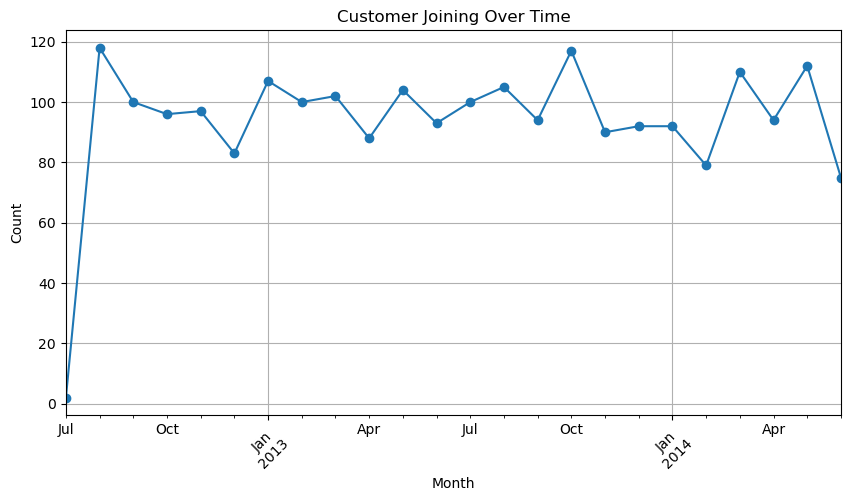

In [ ]:
import matplotlib.pyplot as plt

# Group data by month and count occurrences
df_grouped = df.groupby(df['Dt_Customer'].dt.to_period("M")).size()

# Plot
plt.figure(figsize=(10,5))
df_grouped.plot(kind='line', marker='o')
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Customer Joining Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Handle missing data

### Identify missing data

To clean missing data, we must first identify where they exist.

✅ Check for Missing Values in the Entire DataFrame

In [ ]:
# Check the total number of missing values per column
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 30
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Check the total number of missing values per column sorted by descending order
df.isnull().sum().sort_values(ascending=False)

Income                 30
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

📌 Interpretation:
This shows the number of missing values in each column. If a column has too many missing values, it may require special handling.

✅ Visualize Missing Data

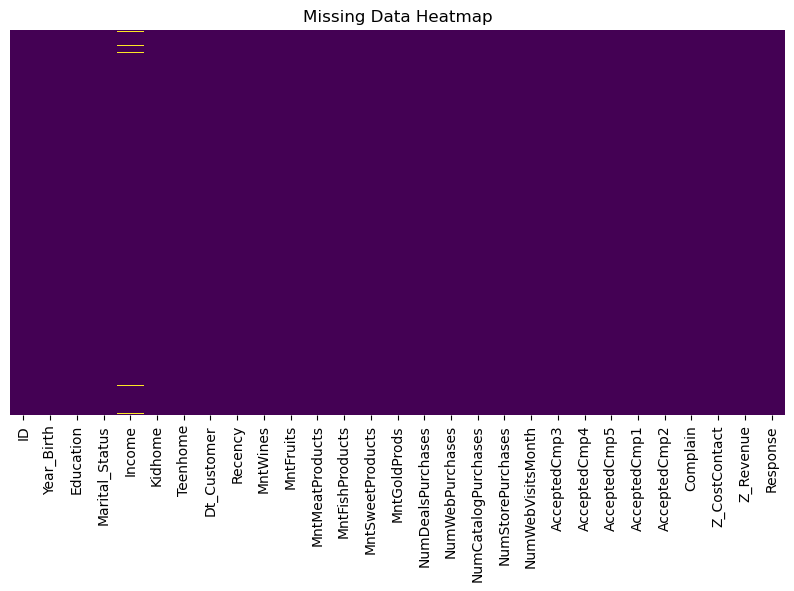

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot missing values as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


**📌 Interpretation:**  
The yellow lines indicate missing values. If a column has **many missing values**, we may need to drop or impute them.

✅ Display Missing Data

In [ ]:
# Display the rows that contain missing values
df[df.isnull().any(axis=1)]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


### Handle missing data

#### Remove missing values


In [ ]:
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,40012,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2246,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
2247,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2248,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


#### Fill missing values with the column mean/median (for numerical data):

In [ ]:
# Replace ["ColumnName"] with "your column"
# df["ColumnName"] = df["ColumnName"].fillna(df["ColumnName"].mean())
df["Income"] = df["Income"].fillna(df["Income"].median())

#### Fill missing values with the column mode (for categorical data):

```python
# Replace ["ColumnName"] with "your column"
df["ColumnName"] = df["ColumnName"].fillna(df["ColumnName"].mode())

In [ ]:
# Write your code here


## Handle duplicated data

### Identifying Duplicates

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()
df[duplicates]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2246,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
2247,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2248,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
2249,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
# Sumiing duplicated data
df.duplicated().sum()

np.int64(4)

**Summing by a Specific Column Combination**

Often, duplicates exist based on a subset of columns (e.g., summing sales by customer and product).



In [ ]:
# Create a DataFrame with some duplicates and some unique names
data = {
    'First Name': ['John', 'Jane', 'John', 'Alice', 'Jane', 'John', 'Alice', 'Mark', 'Sarah'],
    'Last Name': ['Doe', 'Smith', 'Doe', 'Brown', 'Smith', 'Doe', 'Green', 'Taylor', 'Lee'],
    'Age': [30, 25, 30, 40, 25, 35, 45, 50, 28]  # Extra column for variety
}

df_name = pd.DataFrame(data)

print('Original DF')
print(df_name)


# Define the columns to check for duplicates (First Name, Last Name)
cols_to_check = ['First Name', 'Last Name']

# Find duplicate rows based on the combination of first and last name
df_dupes = df_name[df_name.duplicated(subset=cols_to_check, keep=False)]
print('\nDuplicated DF')

print(df_dupes)

Original DF
  First Name Last Name  Age
0       John       Doe   30
1       Jane     Smith   25
2       John       Doe   30
3      Alice     Brown   40
4       Jane     Smith   25
5       John       Doe   35
6      Alice     Green   45
7       Mark    Taylor   50
8      Sarah       Lee   28

Duplicated DF
  First Name Last Name  Age
0       John       Doe   30
1       Jane     Smith   25
2       John       Doe   30
4       Jane     Smith   25
5       John       Doe   35


Are rows 0, 2, 5 really duplicated?

### Remove duplicates

In [ ]:
df.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,108703,1967,Graduation,Married,51381.5,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2242,40012,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2243,72701,1981,Graduation,Divorced,51381.5,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2244,82353,1956,Master,Together,51381.5,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# Step 4: Transform Data

## Normalise data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Sample dataset
data = {
    'Salary': [25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 1000000]  # Includes an extreme outlier
}
df_salary = pd.DataFrame(data)

# Apply Min-Max Scaling (0-1 scaling)
minmax_scaler = MinMaxScaler()
df_salary['Salary_MinMax'] = minmax_scaler.fit_transform(df_salary[['Salary']])

# Apply Z-score Standardisation (Mean = 0, Std = 1)
standard_scaler = StandardScaler()
df_salary['Salary_ZScore'] = standard_scaler.fit_transform(df_salary[['Salary']])

# Apply Robust Scaling (Median-centered, IQR-based scaling)
robust_scaler = RobustScaler()
df_salary['Salary_Robust'] = robust_scaler.fit_transform(df_salary[['Salary']])

# Display the results
print(df_salary)

    Salary  Salary_MinMax  Salary_ZScore  Salary_Robust
0    25000       0.000000      -0.655102          -1.00
1    50000       0.025641      -0.567103          -0.75
2    75000       0.051282      -0.479104          -0.50
3   100000       0.076923      -0.391106          -0.25
4   125000       0.102564      -0.303107           0.00
5   150000       0.128205      -0.215108           0.25
6   175000       0.153846      -0.127109           0.50
7   200000       0.179487      -0.039111           0.75
8  1000000       1.000000       2.776850           8.75


## Encode categorical variable

### Ordinal Encoding (For Ordinal Data i.e. Ordered Categories)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Sample dataset with ordinal categories
df_ordinal = pd.DataFrame({
    'Satisfaction': ['Low', 'Medium', 'High', 'Low', 'High'],
    'Membership': ['Bronze', 'Silver', 'Gold', 'Silver', 'Gold']
})

# Define the order for ordinal categories
category_orders = [
    ['Low', 'Medium', 'High'],   # Order for 'Satisfaction'
    ['Bronze', 'Silver', 'Gold'] # Order for 'Membership'
]

# Initialize and apply Ordinal Encoding
encoder = OrdinalEncoder(categories=category_orders)
df_ordinal[['Satisfaction_Encoded', 'Membership_Encoded']] = encoder.fit_transform(df_ordinal[['Satisfaction', 'Membership']])

print(df_ordinal)


  Satisfaction Membership  Satisfaction_Encoded  Membership_Encoded
0          Low     Bronze                   0.0                 0.0
1       Medium     Silver                   1.0                 1.0
2         High       Gold                   2.0                 2.0
3          Low     Silver                   0.0                 1.0
4         High       Gold                   2.0                 2.0


🔍 **Explanation**  
- **Low, Medium, High** are converted into **0, 1, 2** (in increasing order).  
- **Bronze, Silver, Gold** are converted into **0, 1, 2**.  
- This method is useful when **higher values indicate a stronger effect** (e.g., Satisfaction or Membership levels).  

---

### One-Hot Encoding (For Nominal Data i.e. Unordered Categories)

In [ ]:
# Sample dataset with nominal categories
df_nominal = pd.DataFrame({'City': ['New York', 'London', 'Tokyo', 'London', 'Tokyo']})

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_nominal, columns=['City'])

print(df_encoded)

   City_London  City_New York  City_Tokyo
0        False           True       False
1         True          False       False
2        False          False        True
3         True          False       False
4        False          False        True


**🔍 Explanation**
- `pd.get_dummies()` creates a **separate column** for each category.  
- If a row belongs to `"New York"`, the `City_New York` column gets **1**, and others remain **0**.  
- This method is useful when **categories are equally important and unordered**.  

---

**Avoiding the Dummy Variable Trap**

**Issue:** If we create `n` columns for `n` categories, they can be **redundant** because one column can be derived from the others.  
**Solution:** Drop one column using `drop_first=True` to avoid multicollinearity.

In [ ]:
df_one_hot_drop_first = pd.get_dummies(df_nominal, columns=['City'], drop_first=True)
print(df_one_hot_drop_first)

   City_New York  City_Tokyo
0           True       False
1          False       False
2          False        True
3          False       False
4          False        True


# Step 5: Save the Cleaned Data
After cleaning and preprocessing your dataset, you need to save it for further analysis. This ensures that your cleaned data is stored in a structured format, ready for machine learning, visualization, or reporting.

The most common format for storing structured data is **CSV (Comma-Separated Values)**. Use the `.to_csv()` function to save the cleaned DataFrame.


In [ ]:
# Save the cleaned dataset as a CSV file
df.to_csv("cleaned_data.csv", index=False)

🔍 **Explanation**  
- `"cleaned_data.csv"` → Specifies the filename.  
- `index=False` → Prevents pandas from saving the DataFrame index as a separate column.  

---

After saving, you can **reload your cleaned data** in future analyses:


In [ ]:
df = pd.read_csv("cleaned_data.csv")

# 🏠 Homework: Apply What You Learned!

1. **Load a different dataset** (e.g., assignment data).  
2. **Perform data inspection, cleaning, and transformation:**  
   - Identify missing values, incorrect data types, and duplicates.  
   - Handle missing data, encode categorical variables, and scale numerical features.  
3. **Save the cleaned dataset.**
4. **Answer the following questions:**  
   - **Were there any issues with the data?** (e.g., missing values, duplicates, outliers)  
   - **What data preprocessing steps did you apply?** (e.g., handling missing values, encoding, scaling)  